## Melbourne Housing Price Analysis 

Loading the libraries needed

In [119]:
#import libraries for EDA and visualisation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm

Reading in the data which is available for download at this site. Source: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [121]:
data= pd.read_csv('melb_data.csv')
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
data.shape

(34857, 21)

In [5]:
# Numerical columns and which has null values 
num_col = data.select_dtypes(exclude=['object'])
num_col
num_col.isnull().sum()

Rooms                0
Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
Lattitude         7976
Longtitude        7976
Propertycount        3
dtype: int64

In [6]:
# Categorical columns and which have null values 
cat_col = data.select_dtypes(exclude=['int64','float64'])
cat_col.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    3
Regionname     3
dtype: int64

### Preliminary analysis of dataset & Data Cleaning

Address the following points first. 

1. Change <b>Postcode </b> from float64 to object (category)
2. Change <b>Car, Bedroom2 and Bathroom </b> from float64 to integer 
3. Change <b>YearBuilt </b>from float64 to integer
4. Missing Values for <b>BuildingArea, Landsize and Distance </b>
5. Missing values for categorical fields 
6. Change <b>Date  </b>from object to Date field

<b>Postcode</b>

In [7]:
data['Postcode']= data['Postcode'].astype('object')

In [8]:
data[data['Postcode'].isnull()] 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace null value of 1 row with mode value

In [9]:
data['Postcode'].fillna(data['Postcode'].mode()[0], inplace=True)

<b> Car </b>

Before doing this, we need to deal with Nan values. We see that 8,728 Nan Car rows which is appropriate to update to 0 since it is possible that some apartments/houses do not have carplots.

In [10]:
data['Car'].isnull().sum()  # 8728 null Car row
data['Car'] = data['Car'].fillna(0)

<b> Bathrooms </b>

8,226 Nan Bathroom rows. Checking the values 

In [11]:
# Check number of bathrooms
data['Bathroom'].value_counts(dropna=False)

1.0     12969
2.0     11064
NaN      8226
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [12]:
data['Bathroom'].describe()

count    26631.000000
mean         1.624798
std          0.724212
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bathroom, dtype: float64

46 houses with 0 bathrooms and 8226 houses with null info about number of bathrooms. 

While it is absolutely possible that older houses have communal bathrooms, 8226 houses with null value is more likely 
to be a case of genuine missing info which was not captured. 

As such, let's replace null Bathrooms with the mode value of 1 bathroom. 

In [13]:
data['Bathroom'] = data['Bathroom'].fillna(1)

<b>Bedroom2 </b>

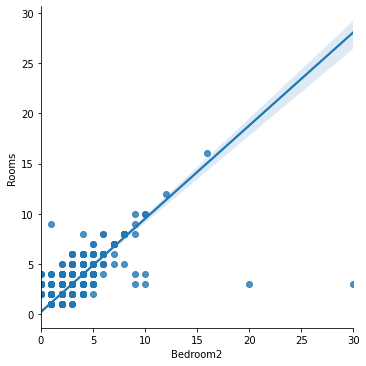

In [14]:
#Check relationship between Bedroom2 and Room
sns.lmplot(data= data, x='Bedroom2', y='Rooms')

The scatterplot shows that there is a perfect linear relationship between Rooms and Bedroom2. 

Because of this relationship, Bedroom2 is a highly correlated feature with Rooms which might contribute to the instability of the model.
As such, let's remove Bedroom2. 


In [15]:
# Drop Bedroom2 & proceed to change Car and Bathroom from float64 to integer
data= data.drop(['Bedroom2'], axis=1)
data['Car']= data['Car'].astype('int64')
data['Bathroom']= data['Bathroom'].astype('int64')

<b> YearBuilt </b> - Change YearBuilt from float64 to integer

In [17]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [18]:
data['YearBuilt'].unique()

array([  nan, 1900., 2014., 2006., 1910., 2009., 1860., 1890., 1925.,
       2005., 2010., 1880., 1985., 1970., 2013., 2012., 1920., 1950.,
       1998., 1930., 2016., 1965., 1960., 1980., 2011., 2015., 1975.,
       1993., 2003., 1995., 1996., 2000., 1990., 1915., 2004., 2008.,
       1916., 1962., 1955., 1988., 1953., 1997., 2007., 1967., 1964.,
       1889., 1888., 1934., 1966., 1935., 1969., 1940., 1938., 1887.,
       1904., 1972., 1978., 1939., 1945., 1927., 1948., 1947., 1968.,
       1958., 2017., 1999., 1992., 1961., 1928., 1977., 1919., 1976.,
       2001., 1926., 1981., 1986., 1943., 1974., 1956., 1936., 1957.,
       1987., 2002., 1952., 1994., 1949., 1905., 1912., 1924., 1885.,
       1923., 1918., 1991., 1942., 1973., 2018., 1982., 2106., 1971.,
       1963., 1931., 1897., 1906., 1883., 1989., 1983., 1937., 1903.,
       1913., 1830., 1895., 1908., 1917., 1902., 1854., 1850., 1898.,
       1941., 1951., 1946., 1984., 1901., 1921., 1929., 1959., 1979.,
       1892., 1933.,

In [19]:
data[data['YearBuilt']>2020] 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105.0,2,2,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0


There is 1 row with value 2106. Assume that this is an error and replace with 2016. 

In [20]:
data['YearBuilt'] = data['YearBuilt'].replace(2106, 2016)

As for the 19,306 nan rows, let's fill them with median values of YearBuilt instead of mean values because mean values are more sensitive to outliers. 

Then proceed to change the type to <i>int64

In [21]:
data['YearBuilt'].fillna(data['YearBuilt'].median(), inplace=True)
data['YearBuilt']= data['YearBuilt'].astype('int64')

In [22]:
## Check the percentage of null rows remaining
round(100*(data.isnull().sum()/len(data.index)), 2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.83
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bathroom          0.00
Car               0.00
Landsize         33.88
BuildingArea     60.58
YearBuilt         0.00
CouncilArea       0.01
Lattitude        22.88
Longtitude       22.88
Regionname        0.01
Propertycount     0.01
dtype: float64

As the null rows in BuildingArea constitute <b>60% of the rows </b> , deleting them will result in a loss of a lot of data. 
I will impute it with median value. But before imputing, let's check for outliers which might affect the median value. 

In [23]:
data['BuildingArea'].describe()

count    13742.00000
mean       160.25640
std        401.26706
min          0.00000
25%        102.00000
50%        136.00000
75%        188.00000
max      44515.00000
Name: BuildingArea, dtype: float64

<AxesSubplot:ylabel='BuildingArea'>

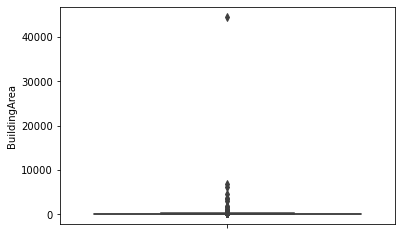

In [24]:
sns.boxplot(data = data, y = 'BuildingArea')

Boxplot shows an outlier with a building area of more than 40000 squared meters.

In [25]:
data.loc[data['BuildingArea']>40000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,3,5,44500.0,44515.0,1970,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0


Building Area is bigger than Landsize. This looks like an error. And the average BuildingArea of houses in Suburb = 'New Gisborne' is 136.

Given that this house has 5 rooms, I'll replace the BuildingArea to 450.

In [26]:
data['BuildingArea'] = data['BuildingArea'].replace(44515.0, 450.0)

In [27]:
data['BuildingArea'].describe() 
# The mean value has changed to 157 while the median remains 136. 

count    13742.000000
mean       157.049807
std        133.558435
min          0.000000
25%        102.000000
50%        136.000000
75%        188.000000
max       6791.000000
Name: BuildingArea, dtype: float64

<AxesSubplot:ylabel='Landsize'>

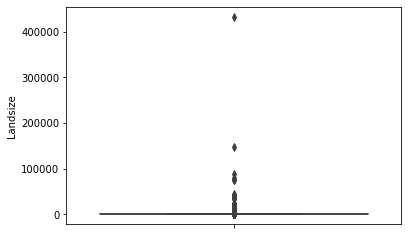

In [28]:
sns.boxplot(data = data, y = 'Landsize')

There seems to be an outlier property with landsize >400000. 

In [29]:
data.loc[data['Landsize']>400000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,3,1,433014.0,NaN,1970,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0


We see that this coincides with 1 row in Yarra City Council with 3 rooms, 1 car lot and buildingarea 136.
We evaluate all properties in Yarra City Council and see that the mean landsize is 568 and median 521. 
Replace the Landsize of this outlier row with median value of 521. 

In [30]:
data.loc[data['CouncilArea']=='Yarra City Council']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1,1,126.0,NaN,1970,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1,1,202.0,NaN,1970,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1,0,156.0,79.0,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2,1,0.0,NaN,1970,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2,0,134.0,150.0,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34666,Richmond,109 Lord St,2,h,925000.0,PI,hockingstuart,24/02/2018,2.4,3121.0,1,0,147.0,NaN,1970,Yarra City Council,-37.82364,145.00456,Northern Metropolitan,14949.0
34667,Richmond,67B Lord St,2,u,NaN,S,Marshall,24/02/2018,2.4,3121.0,1,0,94.0,94.0,2011,Yarra City Council,-37.82202,145.00483,Northern Metropolitan,14949.0
34668,Richmond,108/381 Punt Rd,2,u,770000.0,VB,Jellis,24/02/2018,2.4,3121.0,1,0,NaN,NaN,1970,Yarra City Council,NaN,NaN,Northern Metropolitan,14949.0
34669,Richmond,29/24 Tanner St,2,u,969000.0,S,Jellis,24/02/2018,2.4,3121.0,1,0,NaN,NaN,1970,Yarra City Council,NaN,NaN,Northern Metropolitan,14949.0


In [31]:
data['Landsize'] = data['Landsize'].replace(433014.0, 521.0)

<b> BuildingArea, Landsize and Distance </b>

Similar to how <b>YearBuilt </b> was handled, I will replace missing values for these fields with median() value.

In [32]:
data['BuildingArea'].fillna(data['BuildingArea'].median(), inplace=True)
data['Landsize'].fillna(data['Landsize'].median(), inplace=True)
data['Distance'].fillna(data['Distance'].median(), inplace=True)

<b> Missing values for categorical fields  </b>

In [33]:
cat_col = data.select_dtypes(exclude=['int64','float64'])
cat_col.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    3
Regionname     3
dtype: int64

<b>CouncilArea & Regionname </b> have 3 null values each and they happen to be the same 3 rows. Let's drop these 3 rows. 

In [34]:
data[data['CouncilArea'].isnull()] 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,1,0,521.0,136.0,1970,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,1,0,521.0,136.0,1970,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,10.3,3073.0,1,0,521.0,136.0,1970,NaN,NaN,NaN,NaN,NaN


In [35]:
# Drop these 3 rows
data.drop(index=[18523, 26888,29483], inplace=True)

In [36]:
data['Lattitude']= data['Lattitude'].fillna(data['Lattitude'].median())
data['Longtitude']= data['Longtitude'].fillna(data['Longtitude'].median())

Since <b>Price</b> is the output variable and inputing 21% values of a variable which you want need to predict will risk introducing 
a huge amount of bias. 

We will drop these rows with missing <b>Price</b>.

In [37]:
# Drop rows with missing Price. 
data = data[~np.isnan(data['Price'])]
round(100*(data.isnull().sum()/len(data.index)), 2)

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

In [38]:
## For feature selection - selecting feature for hot-coding
cat_col.nunique() 

#Good candidates: Regionname, Type, Method 
# Drop Suburb, Address, SellerG and CouncilArea as the values are too many 

Suburb           351
Address        34009
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64

### Feature Engineering 

It is reasonable to expect new properties to cost more than old ones. Age of the property should be a good indicator of <b>Price.</b> 

In [39]:
data['Age'] = 2019-data['YearBuilt']

In [40]:
data['Age'] = 2019-data['YearBuilt']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27244 non-null  object 
 1   Address        27244 non-null  object 
 2   Rooms          27244 non-null  int64  
 3   Type           27244 non-null  object 
 4   Price          27244 non-null  float64
 5   Method         27244 non-null  object 
 6   SellerG        27244 non-null  object 
 7   Date           27244 non-null  object 
 8   Distance       27244 non-null  float64
 9   Postcode       27244 non-null  float64
 10  Bathroom       27244 non-null  int64  
 11  Car            27244 non-null  int64  
 12  Landsize       27244 non-null  float64
 13  BuildingArea   27244 non-null  float64
 14  YearBuilt      27244 non-null  int64  
 15  CouncilArea    27244 non-null  object 
 16  Lattitude      27244 non-null  float64
 17  Longtitude     27244 non-null  float64
 18  Region

In [41]:
data['Dateframe'] = pd.to_datetime(data['Date'])

In [42]:
# calculate day of year
data['DayofYr'] = data['Dateframe'].dt.dayofyear
# Create year
data['Year'] = data['Dateframe'].dt.year

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27244 non-null  object        
 1   Address        27244 non-null  object        
 2   Rooms          27244 non-null  int64         
 3   Type           27244 non-null  object        
 4   Price          27244 non-null  float64       
 5   Method         27244 non-null  object        
 6   SellerG        27244 non-null  object        
 7   Date           27244 non-null  object        
 8   Distance       27244 non-null  float64       
 9   Postcode       27244 non-null  float64       
 10  Bathroom       27244 non-null  int64         
 11  Car            27244 non-null  int64         
 12  Landsize       27244 non-null  float64       
 13  BuildingArea   27244 non-null  float64       
 14  YearBuilt      27244 non-null  int64         
 15  CouncilArea    2724

In [45]:
# Create markers of max price of Suburb
# To give the model a better idea that certain Suburb will be a better indicator of price points. Location of the property
# always plays an important factor in Price of the house. 

temp = data.groupby('Suburb').agg({'max'})
temp2 = temp['Price']
temp2 = temp2.reset_index()
temp2.columns = ['Suburb', 'max_sub_id']
data_copy = data
data_copy = pd.merge(data_copy, temp2, on='Suburb', how='left')
data_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Dateframe,DayofYr,Year,max_sub_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1,1,202.0,136.0,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,49,2016-03-12,72,2016,1985000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,119,2016-04-02,93,2016,1985000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,119,2017-04-03,93,2017,1985000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2,1,94.0,136.0,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,49,2017-04-03,93,2017,1985000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1,2,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,5,2016-04-06,97,2016,1985000.0


In [46]:
# Create markers of max price of CouncilArea
# To give the model a better idea that certain CouncilArea will be a better indicator of price points.

council = data.groupby('CouncilArea').agg({'max'})
temp6 = council['Price']
temp6 = temp6.reset_index()
temp6.columns = ['CouncilArea', 'max_c_id']
data_copy = pd.merge(data_copy, temp6, on='CouncilArea', how='left')
data_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Dateframe,DayofYr,Year,max_sub_id,max_c_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1,1,202.0,136.0,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,49,2016-03-12,72,2016,1985000.0,4011000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,119,2016-04-02,93,2016,1985000.0,4011000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,119,2017-04-03,93,2017,1985000.0,4011000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2,1,94.0,136.0,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,49,2017-04-03,93,2017,1985000.0,4011000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1,2,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,5,2016-04-06,97,2016,1985000.0,4011000.0


In [47]:
# Create marker for min price of Type of housing. 
type_g = data.groupby('Type').agg({'min'})
temp3 = type_g['Price']
temp3 = temp3.reset_index()
temp3.columns = ['Type', 'min_t_id']
data_copy = pd.merge(data_copy, temp3, on='Type', how='left')
data_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Dateframe,DayofYr,Year,max_sub_id,max_c_id,min_t_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1,1,202.0,136.0,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,49,2016-03-12,72,2016,1985000.0,4011000.0,131000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,119,2016-04-02,93,2016,1985000.0,4011000.0,131000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,119,2017-04-03,93,2017,1985000.0,4011000.0,131000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2,1,94.0,136.0,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,49,2017-04-03,93,2017,1985000.0,4011000.0,131000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1,2,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,5,2016-04-06,97,2016,1985000.0,4011000.0,131000.0


In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_copy, test_size=0.2, random_state=42)
data = train_set.copy()

## Visualizations



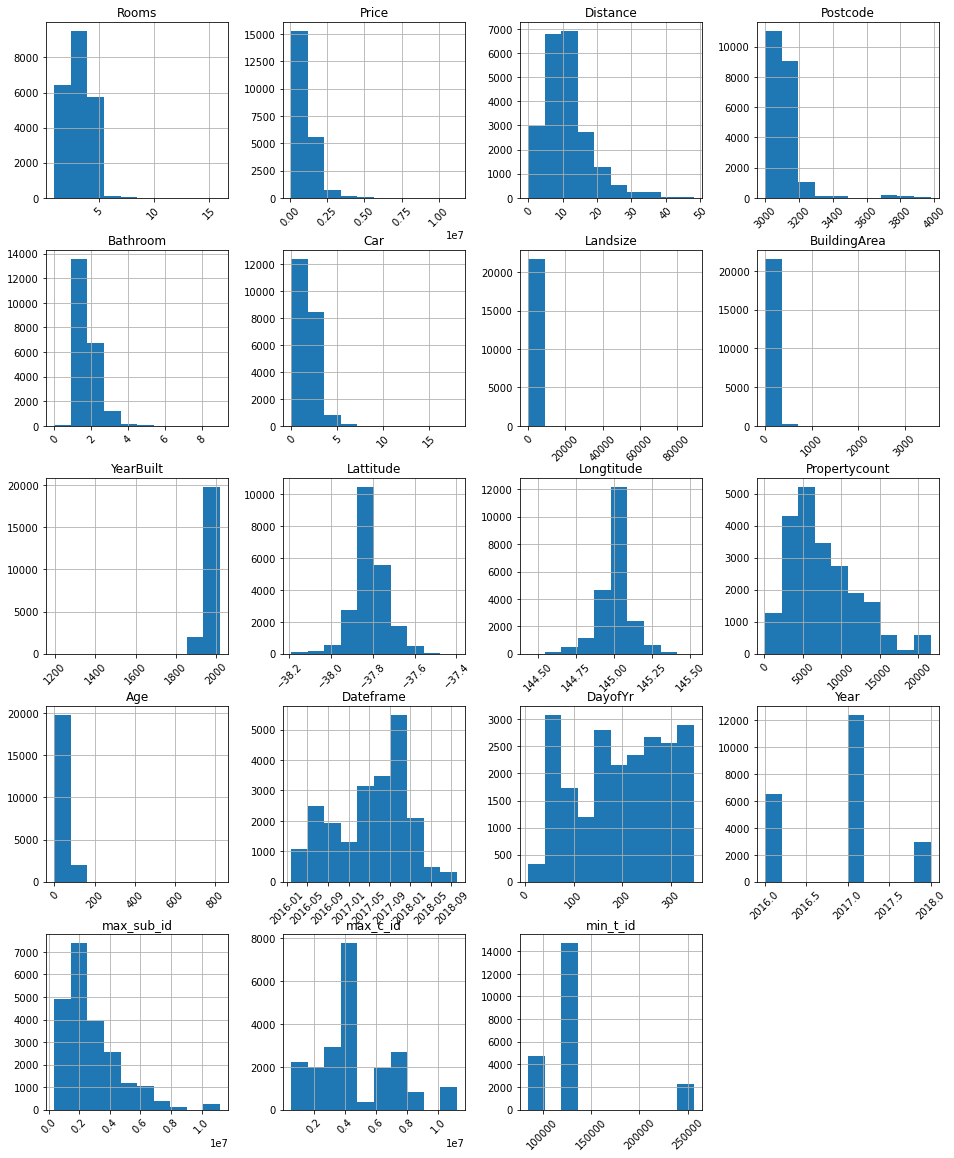

In [49]:
data.hist(figsize=(16,20), xrot=45)
plt.show()

Check Boxplots for Categorical Features

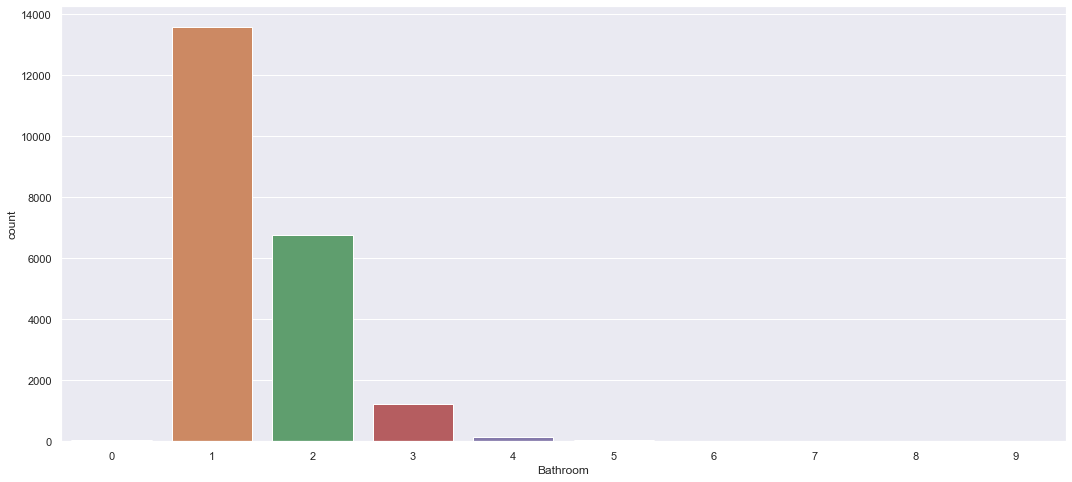

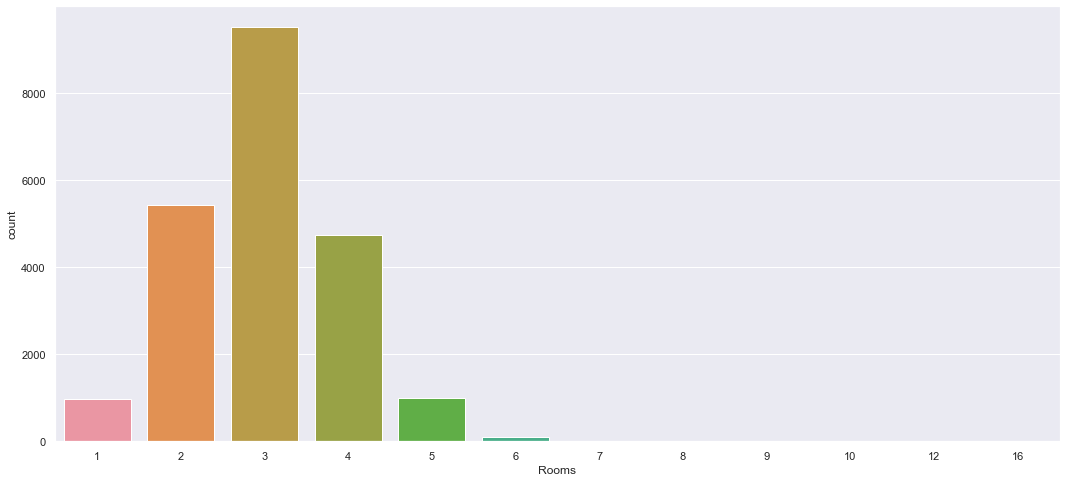

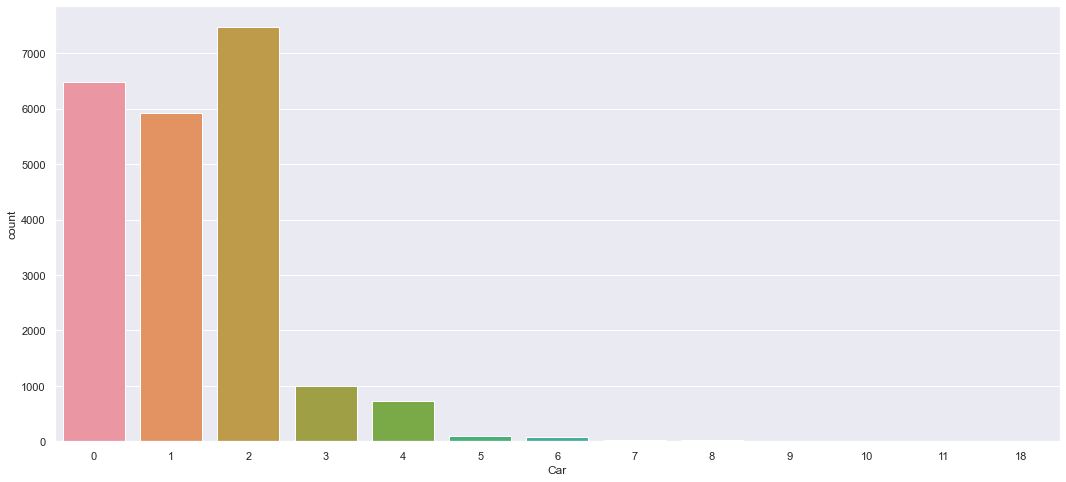

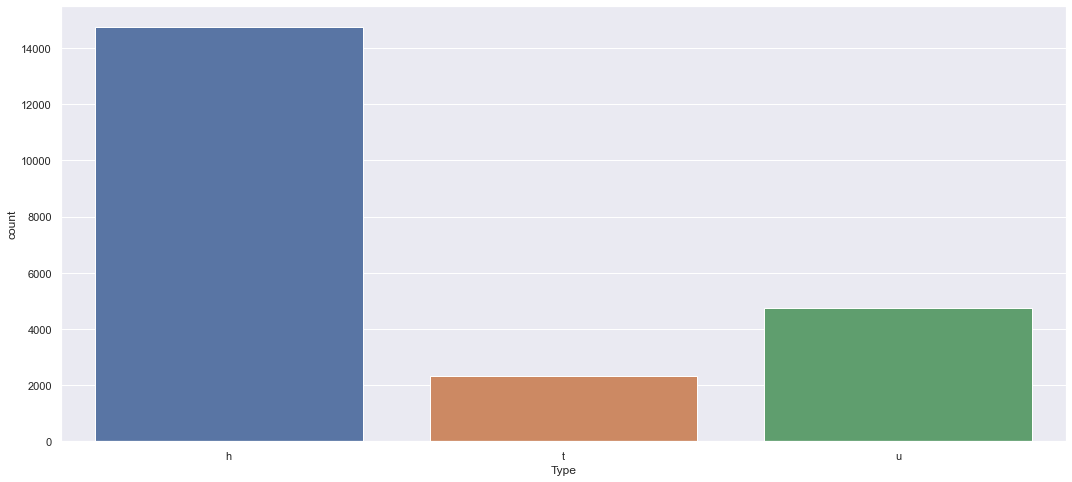

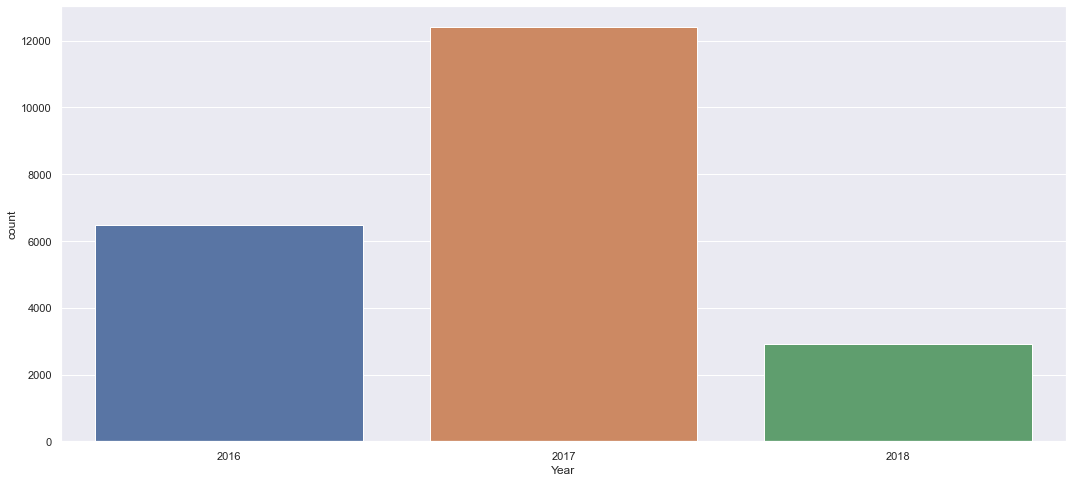

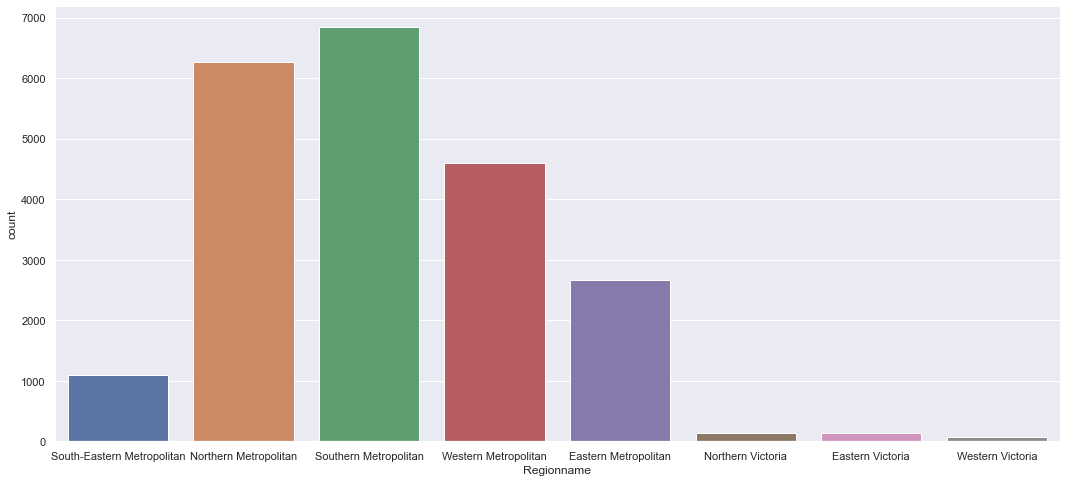

In [50]:
l= ['Bathroom', 'Rooms', 'Car', 'Type', 'Year','Regionname']
for i in l:
    sns.set(rc = {'figure.figsize':(18,8)})
    plt.figure()
    sns.countplot(x=i, data=data)

Observations:

- Most properties sold were Houses <b>Type</b>. 
- Most properties were sold in Yr 2017; 
- Most houses have space for 1 or 2 <b>Cars</b>; 
- between 2 to 4 <b>Rooms</b> and 1 or 2 <b>Bathrooms</b>
- Northern,Southern and Western Metropolitan <b>Regionnames</b> are most popular;


<b>Distribution of Continous Variables using histograms

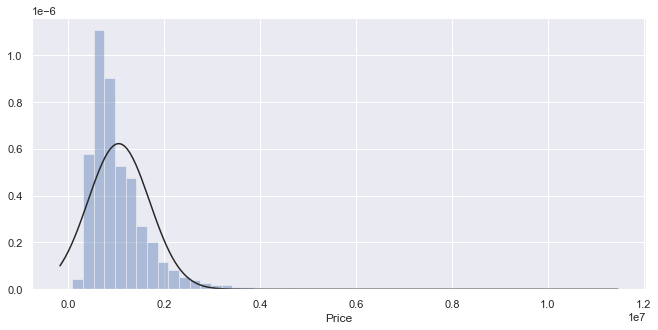

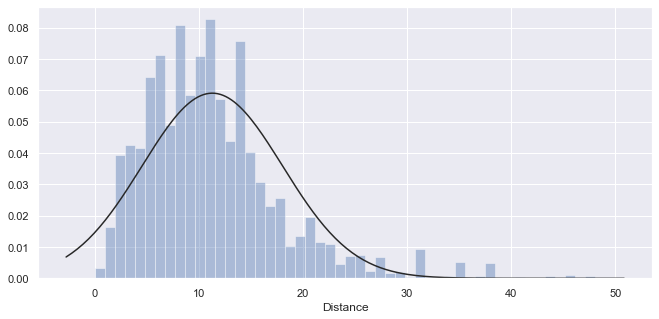

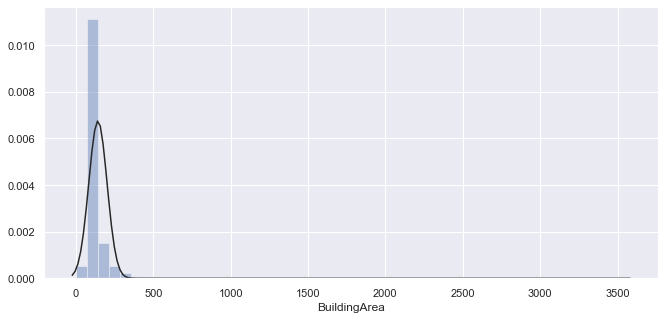

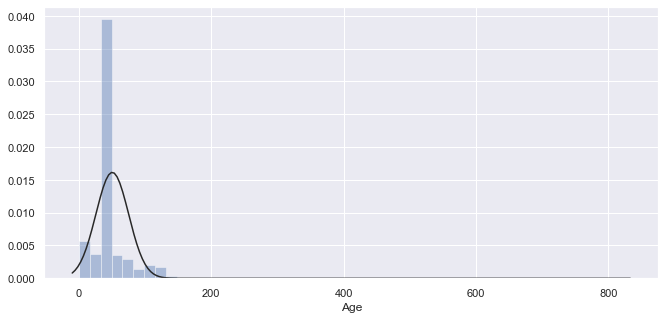

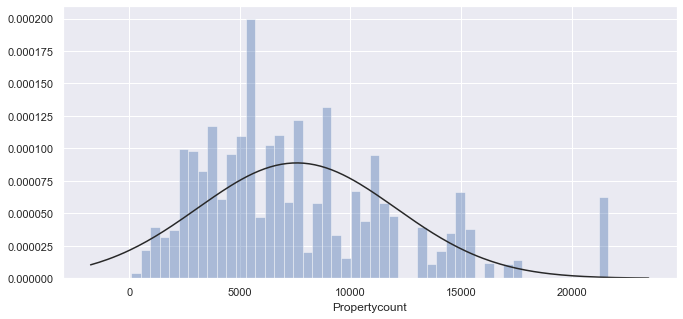

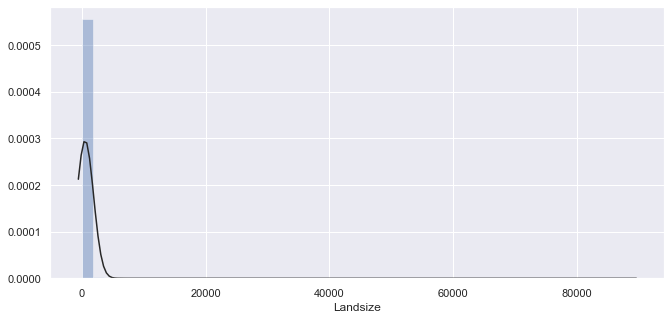

In [51]:
list= [data['Price'], data['Distance'], data['BuildingArea'], data['Age'], data['Propertycount'], data['Landsize']]
for i in list:
    plt.figure(figsize=(11,5))
    sns.distplot(i, fit=norm, kde=False)

(0.0, 800.0)

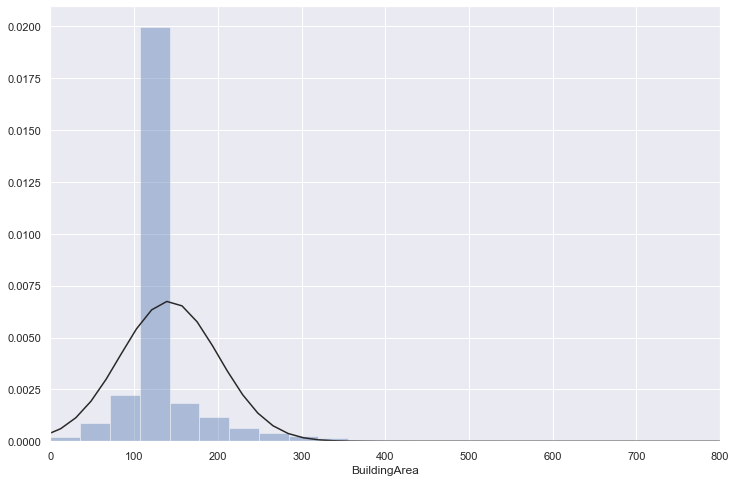

In [52]:
plt.figure(figsize=(12,8))
sns.distplot(data['BuildingArea'], fit=norm, bins=100, kde=False)
plt.xlim(0,800)

Text(0.5, 1.0, 'Rooms & Price')

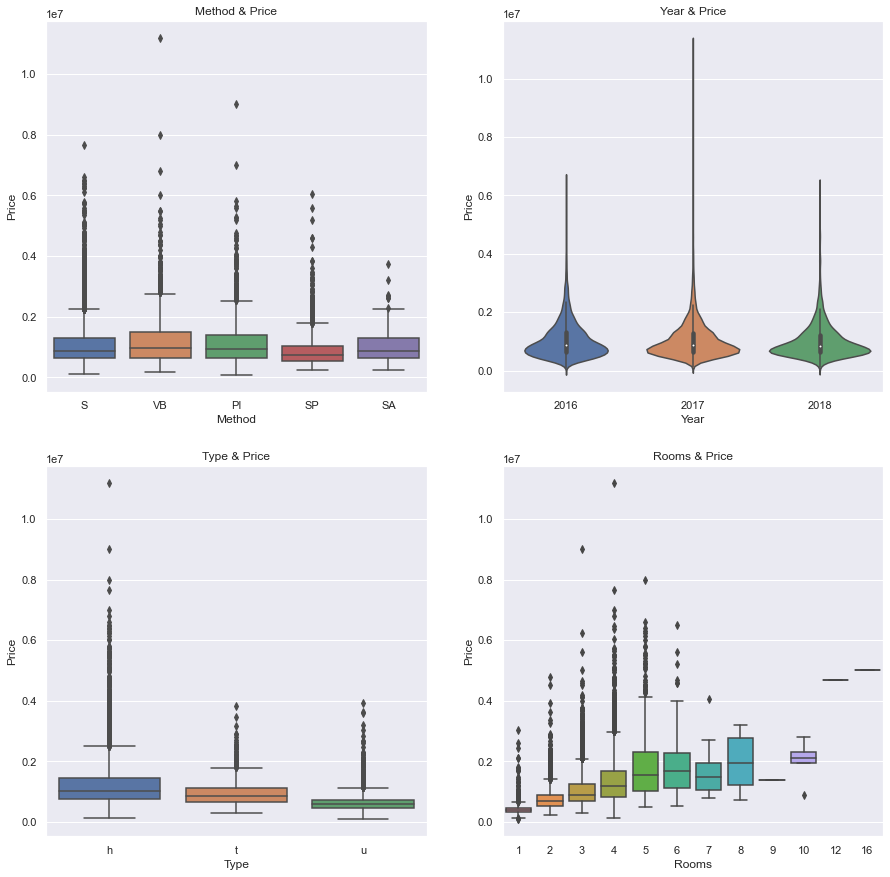

In [53]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = data, x = 'Method', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Method')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Method & Price')

# Plot [0,1]
sns.violinplot(data = data, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = data, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = data, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

Observations : 

- <b>Methods</b> do not seem to provide much info or correlation on sale.  
- 2017 was the year with the highest number of sales with high price outliers. 
- 2018 has less activity. Not sure about the cutoff point of sales data in Yr 2018. 
- It seems that there is a slight linear increase in Price for more <b>Rooms</b>. 
- Properties with 9, 12 and 16 <b>Rooms</b> have very few sales and 0 variability. 
- House <b>Type</b> is an important indicator for indication of Price whereby "h" (houses) cost more and have a higher price variability.

<b>Correlation matrix and scatterplots

In [54]:
attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'Age', 'Lattitude', 'Longtitude', 
             'Year','Propertycount','max_sub_id','max_c_id','min_t_id']

corr1 = data[attributes].corr()

<AxesSubplot:>

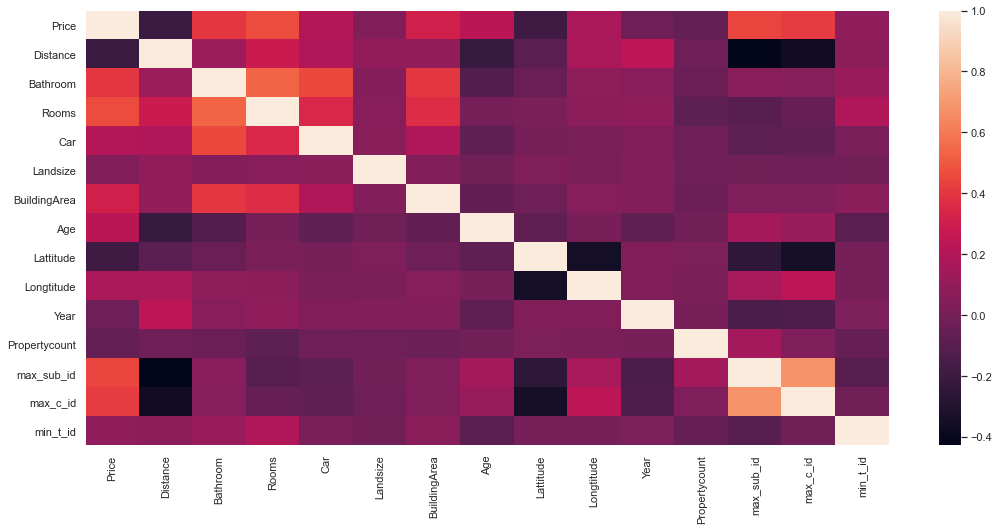

In [55]:
sns.heatmap(corr1)

In [56]:
corr1

,Price,Distance,Bathroom,Rooms,Car,Landsize,BuildingArea,Age,Lattitude,Longtitude,Year,Propertycount,max_sub_id,max_c_id,min_t_id
Price,1.000000,-0.206953,0.399267,0.466312,0.207780,0.035678,0.309520,0.230046,-0.190673,0.170317,-0.022161,-0.058061,0.444649,0.418217,0.090094
Distance,-0.206953,1.000000,0.126753,0.282828,0.187909,0.094151,0.098452,-0.214833,-0.086049,0.179411,0.232328,-0.026396,-0.428216,-0.361382,0.069124
Bathroom,0.399267,0.126753,1.000000,0.533144,0.458680,0.049482,0.398132,-0.115937,-0.041171,0.083085,0.057794,-0.041039,0.057870,0.052356,0.120033
Rooms,0.466312,0.282828,0.533144,1.000000,0.342479,0.060475,0.367048,0.002486,0.020205,0.072905,0.090153,-0.078379,-0.100616,-0.050820,0.190892
Car,0.207780,0.187909,0.458680,0.342479,1.000000,0.066205,0.193514,-0.065694,0.003250,0.015321,0.038321,-0.026241,-0.079598,-0.066018,0.017851
Landsize,0.035678,0.094151,0.049482,0.060475,0.066205,1.000000,0.045248,-0.020577,0.031512,0.013998,0.041043,-0.025119,-0.019309,-0.021861,-0.020881
BuildingArea,0.309520,0.098452,0.398132,0.367048,0.193514,0.045248,1.000000,-0.061639,-0.021555,0.056214,0.040479,-0.033753,0.033296,0.030410,0.066793
Age,0.230046,-0.214833,-0.115937,0.002486,-0.065694,-0.020577,-0.061639,1.000000,-0.071203,0.010986,-0.071920,-0.014338,0.146738,0.118014,-0.093381
Lattitude,-0.190673,-0.086049,-0.041171,0.020205,0.003250,0.031512,-0.021555,-0.071203,1.000000,-0.352088,0.036900,0.024226,-0.254082,-0.339600,0.004417
Longtitude,0.170317,0.179411,0.083085,0.072905,0.015321,0.013998,0.056214,0.010986,-0.352088,1.000000,0.037361,0.022521,0.160596,0.232275,0.004814


The attributes with the highest corr with Price are : 

- Rooms (0.4663)
- max_sub_id (0.4446) [derived from Suburb]
- max_c_id (0.4182) [derived from CouncilArea]
- Bathroom (0.3993) 
- BuildingArea (0.3095)
- Age (0.230046)
- Car (0.2078)
- Distance (-0.2069)
- Lattitude (-0.1906)
- Longitude (0.1703)

<AxesSubplot:xlabel='max_c_id', ylabel='Price'>

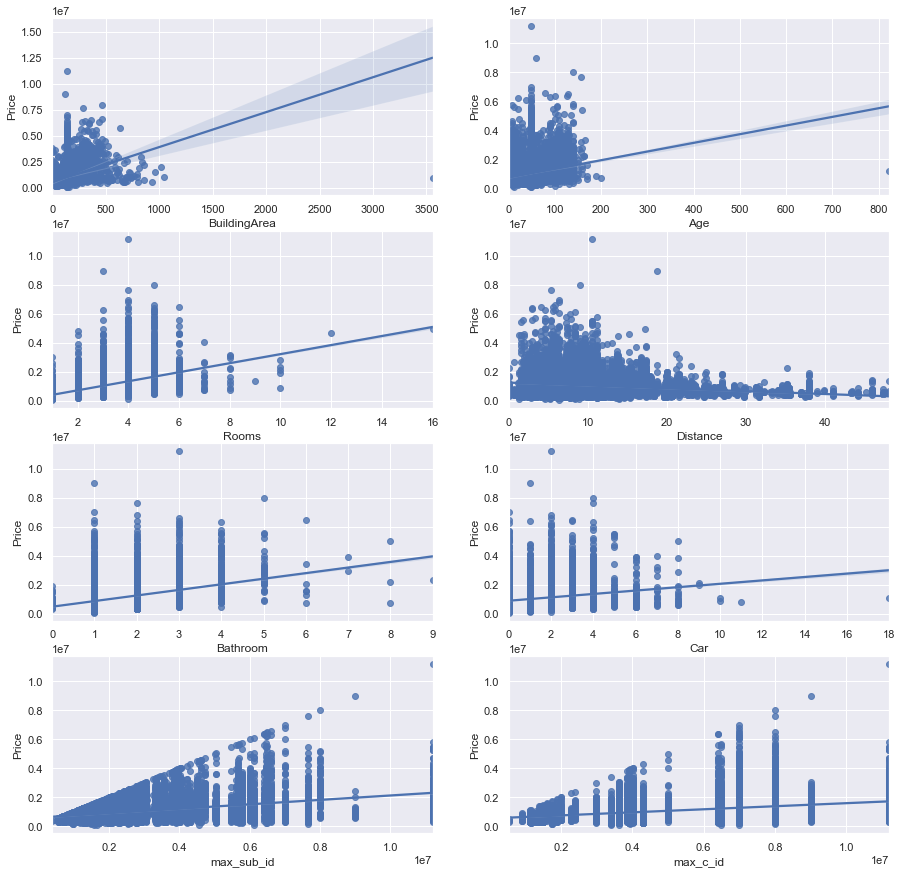

In [57]:
# Scatterplot to show relationship with Price 
f, axes = plt.subplots(figsize = (15,15))
plt.subplot(421)
sns.regplot(data= data, x='BuildingArea', y='Price')
plt.subplot(422)
sns.regplot(data= data, x='Age', y='Price')
plt.subplot(423)
sns.regplot(data= data, x='Rooms', y='Price')
plt.subplot(424)
sns.regplot(data= data, x='Distance', y='Price')
plt.subplot(425)
sns.regplot(data= data, x='Bathroom', y='Price')
plt.subplot(426)
sns.regplot(data= data, x='Car', y='Price')
plt.subplot(427)
sns.regplot(data= data, x='max_sub_id', y='Price')
plt.subplot(428)
sns.regplot(data= data, x='max_c_id', y='Price')

In [ ]:
sns.lmplot(data= data, x='BuildingArea', y= 'Price', hue='Type')

In [ ]:
sns.color_palette("husl", 8)
sns.lmplot(data= data, x='Rooms', y= 'Price', hue='Type')

### Machine learning

In [58]:
# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21795 entries, 5799 to 23654
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         21795 non-null  object        
 1   Address        21795 non-null  object        
 2   Rooms          21795 non-null  int64         
 3   Type           21795 non-null  object        
 4   Price          21795 non-null  float64       
 5   Method         21795 non-null  object        
 6   SellerG        21795 non-null  object        
 7   Date           21795 non-null  object        
 8   Distance       21795 non-null  float64       
 9   Postcode       21795 non-null  float64       
 10  Bathroom       21795 non-null  int64         
 11  Car            21795 non-null  int64         
 12  Landsize       21795 non-null  float64       
 13  BuildingArea   21795 non-null  float64       
 14  YearBuilt      21795 non-null  int64         
 15  CouncilArea    2

In [60]:
#One-hot encoding for categorical variables

#dummy variable - apply OneHot encoding to get df
OneHot= pd.get_dummies(data, columns= ['Type', 'Regionname'])
#drop useless variables
OneHot= OneHot.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea',
            'YearBuilt', 'Dateframe', 'DayofYr'], axis=1)
#check variables
OneHot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21795 entries, 5799 to 23654
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  21795 non-null  int64  
 1   Price                                  21795 non-null  float64
 2   Distance                               21795 non-null  float64
 3   Bathroom                               21795 non-null  int64  
 4   Car                                    21795 non-null  int64  
 5   Landsize                               21795 non-null  float64
 6   BuildingArea                           21795 non-null  float64
 7   Lattitude                              21795 non-null  float64
 8   Longtitude                             21795 non-null  float64
 9   Propertycount                          21795 non-null  float64
 10  Age                                    21795 non-null  int64  
 11 

In [61]:
OneHot.shape

(21795, 26)

## Feature Scaling 

The scales of the features range from single digit for Rooms and Age to millions for Price. Let's apply scaling to standardize them into a fixed range to facilitate standard interpretation by the model. 

In [64]:
X = OneHot.drop("Price", axis=1)
Y = OneHot["Price"]

In [65]:
# Choose RobustScaler for it's robustness to outliers

scaler = RobustScaler()
OneHot2= scaler.fit_transform(OneHot.astype(np.float64))

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

In [67]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)
#fit xgb
xgb = XGBRegressor(learning_rate=0.1,use_label_encoder=False,eval_metric='rmse')
xgb.fit(x_train, y_train)
#fit gradientbooster
gb = GradientBoostingRegressor(learning_rate=0.1,loss ='squared_error')
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [68]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree),('XGB',xgb),('GradientBoost',gb)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 394822.61
RMSE of random forest = 139802.59
RMSE of decision tree = 96041.63
RMSE of XGB = 223985.13
RMSE of GradientBoost = 292161.88


In [69]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 72.49 %
Accuracy of random forest= 93.00 %
Accuracy of decision tree= 97.77 %
Accuracy of XGB= 86.39 %
Accuracy of GradientBoost= 82.64 %


Based on the model with the lowest error (RMSE score), random forest is the best and the model accuracy is also the highest followed by XGB. 

As this evaluation is applied on the train set, the risk of overfitting is quite high. 

## Comparing Model using Cross Validation

In [70]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree),('XGB',xgb),('GradientBoost',gb)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#3 different scoring metrics for each model where results[0] will be lin_reg x MSE, results[1] lin_reg x MSE and 
# so on until results [14], where we stored gb x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [71]:
#FOR LINEAR REGRESSION
#
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RANDOM FOREST
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DECISIONTREE
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

#XGB
XGB_RMSE_mean = np.sqrt(-results[9]['test_score'].mean())
XGB_RMSE_std= results[9]['test_score'].std()
XGB_MAE_mean = -results[10]['test_score'].mean()
XGB_MAE_std= results[10]['test_score'].std()
XGB_r2_mean = results[11]['test_score'].mean()
XGB_r2_std = results[11]['test_score'].std()
#GB
GB_RMSE_mean = np.sqrt(-results[12]['test_score'].mean())
GB_RMSE_std= results[12]['test_score'].std()
GB_MAE_mean = -results[13]['test_score'].mean()
GB_MAE_std= results[13]['test_score'].std()
GB_r2_mean = results[14]['test_score'].mean()
GB_r2_std = results[14]['test_score'].std()

In [72]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees','XGB','GB'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean,XGB_RMSE_mean,GB_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std,XGB_RMSE_std,GB_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean,XGB_MAE_mean,GB_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std,XGB_MAE_std,GB_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean,XGB_r2_mean,GB_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std,XGB_r2_std,GB_r2_std]
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
3,XGB,286718.266396,1.195693e+10,165964.239943,3889.124065,0.800714,0.015330
1,Random Forest,302508.853154,1.172934e+10,171483.657883,3768.346131,0.777869,0.015792
4,GB,312042.801138,1.492122e+10,185274.659900,3214.355414,0.764242,0.017344
2,Decision Trees,386210.337953,2.038584e+10,222551.815950,5504.977941,0.643746,0.021216
0,Linear Regression,395647.092560,2.416026e+10,253923.865115,5322.543702,0.621089,0.026033


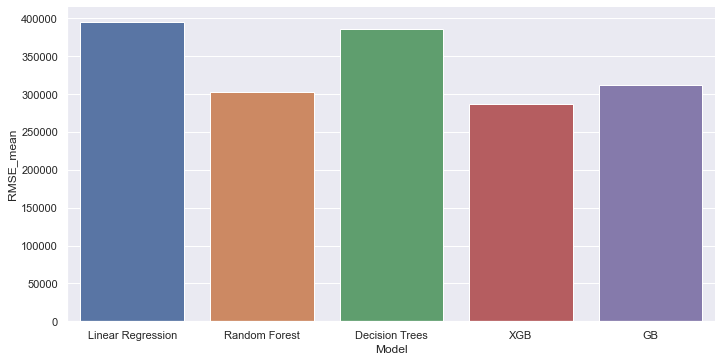

In [73]:

sns.catplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True',height=5,aspect=2)

The best model is XGB, followed by Random Forest, then GB. 

## Feature Importance 

In [98]:
cdf = pd.DataFrame(data = xgb.feature_importances_, index = X.columns, columns = ['Importance'])
cdf.sort_values(by=['Importance'], ascending = False)

,Importance
Type_h,0.384080
max_sub_id,0.118853
min_t_id,0.109275
Regionname_Southern Metropolitan,0.097328
Rooms,0.077095
Regionname_Northern Metropolitan,0.039522
Bathroom,0.034629
max_c_id,0.025867
BuildingArea,0.015968
Landsize,0.015635


In [99]:
cdf2 = cdf.reset_index()

In [116]:
cdf2.rename(columns = {"index" : "Colname"}, inplace = True)
cdf2.sort_values(by=['Importance'], ascending = False, inplace=True)
cdf3 = cdf2.head(10)

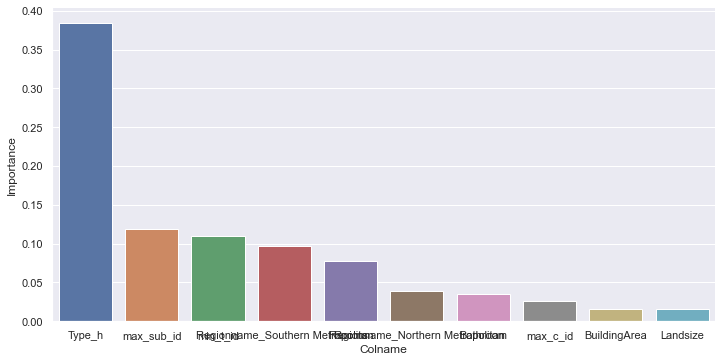

In [117]:
sns.catplot(x= 'Colname', y= 'Importance', data= cdf3, kind='bar', legend='True',height=5,aspect=2)

In [118]:
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500]}

xgbr = XGBRegressor(learning_rate=0.1,use_label_encoder=False,eval_metric='rmse')
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6}
Lowest RMSE:  285343.567851427
